### Solving Duffing equation using time integration

The duffing equation is given by:

$$
\ddot{x} + \delta\dot{x} + \alpha x + \beta x^3 = \gamma cos(\omega t)
$$

where $\delta$, $\alpha$, $\beta$, $\gamma$ and $\omega$ are constants such that:
- $\delta$ controls the amount of damping,

- $\alpha $ controls the linear stiffness,

- $\beta $ controls the amount of non-linearity in the restoring force; if $\beta =0,$ the Duffing equation describes a damped and driven simple harmonic oscillator,

- $\gamma $ is the amplitude of the periodic driving force; if ${\gamma =0}$ the system is without a driving force, and

- $\omega $ is the angular frequency of the periodic driving force.


### Import libraries


In [1]:
using DifferentialEquations
using Plots

The second-order ODE can be converted into a system of two first order ODEs. 

$$y_1 = x$$
$$y_2 = \dot{x}$$

The duffing equation is then modified to: 
$$ \dot{y_1} = y_2$$
$$\dot{y_2} = -\delta y_2 - \alpha y_1 - \beta y_1^3 + \gamma cos(\omega t)$$

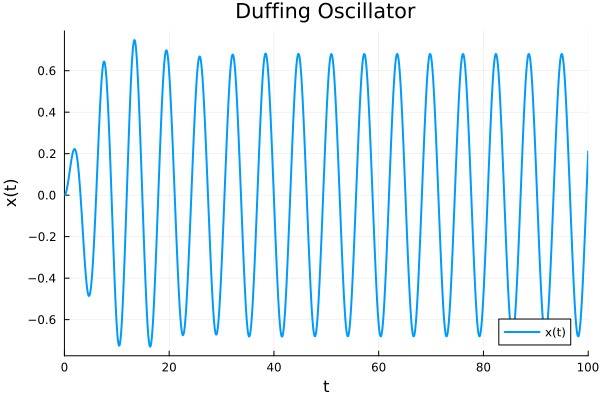

In [6]:
#Define the Duffing equations


function duffing(du, u, p, t)
    alpha, delta, beta, gamma, omega = p
    du[1] = u[2]
    du[2] = -delta * u[2] - alpha * u[1] - beta * u[1]^3 + gamma * cos(omega * t)
end

# Setting parameters
alpha = 1.0 # linear stiffness
beta = 1.0 # nonlinear stiffness
delta = 0.3 # damping coefficient
gamma = 0.3 # forcing amplitude
omega = 1.0 # forcing frequency

p = [alpha, delta, beta, gamma, omega]

# Define initial conditions
u0 = [0.0, 0.0]

# Define time span
tspan = (0.0, 100.0)

# Solve the ODE
prob = ODEProblem(duffing, u0, tspan, p)
sol = solve(prob, Euler(), dt=0.01) # setting solver to euler

# Plot for x(t)
plot(sol, vars=(0, 1), linewidth=2, title="Duffing Oscillator", xaxis="t", yaxis="x(t)", label="x(t)", legend=:bottomright)
